
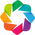

In [1]:
import holoviews as hv
hv.notebook_extension('bokeh')

In [2]:
import pandas as pd

df = pd.read_parquet('galex-gaia-asc.parq')

In [3]:
df.head()

,ra,dec,pmra,pmra_error,pmdec,pmdec_error,parallax,parallax_error,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag,e_bv,mag_nuv,magerr_nuv,mag_fuv,magerr_fuv,ra_galex,dec_galex
0,43.505855,76.258567,-0.540157,0.047652,-1.681409,0.055018,0.603398,0.034763,15.522542,16.076017,14.814747,0.478915,22.041107,0.245312,23.173120,0.805705,43.505493,76.258545
1,44.281474,76.304329,-6.735720,0.067963,6.419370,0.059162,1.028116,0.039508,15.790330,16.341059,15.086226,0.443956,22.105860,0.261621,99.000000,99.000000,44.283397,76.303848
2,62.459319,72.067131,-17.193687,0.037800,20.658518,0.051662,2.798049,0.027964,11.288994,11.631014,10.801546,0.219418,15.952744,0.008862,20.527836,0.209555,62.459116,72.067217
3,62.216501,72.057006,5.548263,0.038400,-14.431339,0.050560,2.064404,0.031591,12.588143,12.934537,12.090192,0.215987,17.965931,0.023638,23.927099,3.040072,62.216401,72.057033
4,62.275616,72.051641,2.030268,0.049677,-3.887242,0.072976,0.335537,0.039952,15.690301,16.091894,15.123739,0.222029,21.104761,0.151014,26.167763,17.857845,62.276243,72.051772


In [5]:
ds = hv.Dataset(df)

In [37]:
len(ds)

23001781

In [41]:
%%opts RGB [width=800, height=500]
from holoviews.operation.datashader import datashade
import datashader

datashade(hv.Points(ds, kdims=['ra', 'dec'], vdims=['parallax']), aggregator=datashader.mean('parallax'))

:DynamicMap   []

In [42]:
# Add some more interesting columns to dataframe 
import numpy as np

df['DM'] = 5 * np.log10(100/df['parallax'])
df['NUV-G'] = df.mag_nuv - df.phot_g_mean_mag
df['M_G'] = (df.phot_g_mean_mag - df.DM)
df['parallax_snr'] = df.parallax / df.parallax_error

/ssd/lsstsw/stack3_20171021/python/miniconda3-4.3.21/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log10
  after removing the cwd from sys.path.


In [60]:
%%opts RGB [width=800, height=500, invert_yaxis=True]

from holoviews.operation.datashader import dynspread, datashade

ds = hv.Dataset(df)

def colormag(log_snr_cut=10, x_range=None, y_range=None):
    pts = hv.Points(ds.select(parallax_snr=(10**log_snr_cut,np.inf)), kdims=['NUV-G', 'M_G'])
    return dynspread(datashade(pts, dynamic=False, x_range=x_range, y_range=y_range))
    
# datashade(hv.Points(ds, kdims=['NUV-G', 'M_G']))
dmap = hv.DynamicMap(colormag, kdims=['log_snr_cut'], streams=[hv.streams.RangeXY()]).redim.range(log_snr_cut=(0.,4))
dmap

/ssd/lsstsw/stack3_20171021/python/miniconda3-4.3.21/lib/python3.6/site-packages/holoviews/core/data/interface.py:247: RuntimeWarning: invalid value encountered in greater_equal
  mask &= k.start <= arr
/ssd/lsstsw/stack3_20171021/python/miniconda3-4.3.21/lib/python3.6/site-packages/holoviews/core/data/interface.py:249: RuntimeWarning: invalid value encountered in less
  mask &= arr < k.stop


:DynamicMap   [log_snr_cut]